## Agentic AI - Using the provided tools to answer a question
## ReAct Framework (LLM) model to answer the question

In [4]:
# Tools  
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.wikipedia.tool import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [ ]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv papers")     # making the tools required using the API wrappers
print(arxiv.name)

arxiv


In [6]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [ ]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="Query Wikipedia articles")   # making the wiki tools using API too
print(wiki.name)

wikipedia


In [8]:
wiki.invoke("Cancer")

'Page: Cancer\nSummary: Cancer is a group of diseases involving abnormal cell growth with the potential to invade or spread to other parts of the body. These contrast with benign tumors, which do not spread. Possible signs and symptoms include a lump, abnormal bleeding, prolonged cough, unexplained weight loss, and a change in bowel movements. While these symptoms may indicate cancer, they can also have other causes. Over 100 types of cancers affect humans.\nTobacco use is the cause of about 22% of'

In [ ]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")   # Tavily is more like a search engine for answering questions.like google, using its API
os.environ["GROQ_API_KEY"] =os.getenv("GROQ_API_KEY") 

In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [13]:
tavily.invoke("Provide me the recent news in AI")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "Tuesday, November 12, 2024\n\nGiving Robots Superhuman Vision Using Radio Signals\n\nMonday, November 11, 2024\n\nAI Can Detect Serious Neurologic Changes in Babies in the NICU Using Video Data Alone\nRobot That Watched Surgery Videos Performs With Skill of Human Doctor, Researchers Report\n\nThursday, November 7, 2024\n\nRobot Learns How to Clean a Washbasin\n\nWednesday, November 6, 2024\n\nAI-Driven Mobile Robots Team Up to Tackle Chemical Synthesis\n\nThursday, October 31, 2024 [...] Using Robots in Nursing Homes Linked to Higher Employee Retention, Better Patient Care\n\nMonday, January 6, 2025\n\nAI Slashes Cost and Time for Chip Design, but That Is Not All\n\nThursday, January 2, 2025\n\nArtificial Intelligence: Algorithms Improve Medical Image Analysis\n\nFriday, December 27, 2024\n\nCrossing the Uncanny Valley: Breakthrou

In [14]:
# Combining all these tools in the list
tools = [arxiv, wiki, tavily]

In [ ]:
# Initialize the LLM model

from langchain_groq import ChatGroq

llm = ChatGroq(                                     #LLM model used here is groq's ChatGroq qwen-qwq-32b 
    model="qwen-qwq-32b"
)

In [18]:
llm.invoke("What is AI ?")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI?" Let me start by breaking down the term. AI stands for Artificial Intelligence, so I should explain what that means. I need to make sure to cover the basics first. Maybe start with a simple definition, like AI being the simulation of human intelligence in machines. But I should also mention that it\'s a broad field, so perhaps outline the main components: learning, reasoning, problem-solving.\n\nWait, the user might be a beginner, so I shouldn\'t assume too much prior knowledge. I should explain the key areas of AI without jargon. Let me think about how to categorize AI types. There\'s the distinction between general AI and narrow AI. General AI being human-like intelligence that can handle various tasks, but that\'s still theoretical. Narrow AI is what we have now, like voice assistants or recommendation systems. I should mention both to clarify the current state versus future possibilities.\n\nAlso, it\'s important 

In [19]:
llm_with_tools = llm.bind_tools(tools=tools)

In [20]:
# Execute this call 

llm_with_tools.invoke("What is the recent news about AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kz8w', 'function': {'arguments': '{"query": "recent news about AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 323, 'total_tokens': 474, 'completion_time': 0.368863042, 'prompt_time': 0.029494335, 'queue_time': 0.232439904, 'total_time': 0.398357377}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5a582bd1-7811-4b7a-bef3-d5e90d4e7c21-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news about AI'}, 'id': 'call_kz8w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 151, 'total_tokens': 474})

Here the LLM is not just making a response ,but it is calling a tool , which in the given context of the query is tavily, it is tool calling to fetch the recent news. This way , it is combining multiple tools in a single response.

ie now the LLM is able to understand which tool to call and how to call it , thus improving its performance and making it more useful.

In [ ]:
#Similarly here are examples of calling the arxiv and wikipedia tools



In [23]:
llm_with_tools.invoke("Give me a recent research paper on RNN?")     ##arxiv

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mmra', 'function': {'arguments': '{"query": "RNN recent"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 500, 'prompt_tokens': 325, 'total_tokens': 825, 'completion_time': 1.251982261, 'prompt_time': 0.042595342, 'queue_time': 0.554292075, 'total_time': 1.294577603}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8f75837e-1064-4d7a-a72c-40bf8f00a353-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'RNN recent'}, 'id': 'call_mmra', 'type': 'tool_call'}], usage_metadata={'input_tokens': 325, 'output_tokens': 500, 'total_tokens': 825})

In [24]:
llm_with_tools.invoke("What is Reinforcement Learning?")     ##Wikipedia

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_93wh', 'function': {'arguments': '{"query": "Reinforcement Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 391, 'prompt_tokens': 321, 'total_tokens': 712, 'completion_time': 0.971232392, 'prompt_time': 0.026815328, 'queue_time': 0.23774119000000002, 'total_time': 0.99804772}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e7b767bd-15b0-4e3c-97a4-4d555b6b15a4-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Reinforcement Learning'}, 'id': 'call_93wh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 321, 'output_tokens': 391, 'total_tokens': 712})

Also in some relevant cases, the LLM can directly give the response to the user's question, instead of calling a tool.

## WORKFLOW

In [27]:
# State schema
from typing_extensions import TypedDict  
from langchain_core.messages import AnyMessage #Human Message or AI Message
from typing import Annotated  #labelling
from langgraph.graph.message import add_messages  #Reducers in langgraph

In [28]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


In [29]:
# Entire Chatbot using LangGraph
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

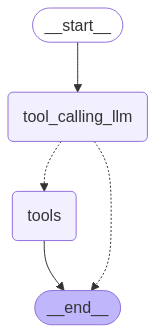

In [33]:
# node definition

def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#Build the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message (result) from assistant is a tool call -> tool condition routes to tools
    #If the latest message (result) from assistant is not a tool call -> tools condition routes to tool_calling_llm
    tools_condition,
)

builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({"messages": "1706.03762"})     # "1706.03762" is an example of a recent research paper
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_tvk0)
 Call ID: call_tvk0
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [36]:
messages = graph.invoke({"messages": "Hello , How are you today?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello , How are you today?
================================== Ai Message ==================================

Hello! I'm just a large language model, so I don't have feelings, but I'm here to help you! How can I assist you today?


In [39]:
messages = graph.invoke({"messages": "Hello , My name is Abhinav?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello , My name is Abhinav?
================================== Ai Message ==================================

Hello Abhinav! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific.


As we can see, the LLM is able to understand the user's question, call the appropriate tool  and give the response. This way, it is able to provide a more relevant and useful response to the user.

ie If not a relevenat tool call, the LLM will directly give the response to the user's question.

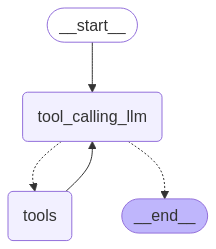

In [38]:
# node definition

def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#Build the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message (result) from assistant is a tool call -> tool condition routes to tools
    #If the latest message (result) from assistant is not a tool call -> tools condition routes to tool_calling_llm
    tools_condition,
)

builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View

display(Image(graph.get_graph().draw_mermaid_png()))

Here only a slight change is made in the graph(workflow). Now, other than giving the rseponse directly from tools to the end, it returns the result of the LLM to the tool_calling_llm node. The result is sent to the end ndoe only from the tool_calling_llm node. 

In [41]:
messages = graph.invoke({"messages": "What is the recent AI news and then please tell me the recent research paper on RNN?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on RNN?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5d7c)
 Call ID: call_5d7c
  Args:
    query: recent AI news
  arxiv (call_eebg)
 Call ID: call_eebg
  Args:
    query: Recurrent Neural Networks
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "Press corner\n\nRSS feed\n\nSubscribe\nBreadcrumb\n\n\nTechnology\nAI\n\nThe latest AI news we announced in March\nApr 04, 2025\n·4 min read\nShare\nTwitterFacebookLinkedInMail\nCopy link\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded acces

## ReAct framework 

This last used workflow is the demonstration of the ReAct(Reasoning and Acting) framework of LLM models. Here the tool_calling_llm node will reason first and identify that if it needs to call a tool and how many contexts are there in the provided question or query. Then it will call the appropriate tool(s) based on the identified contexts and provide the final response. This helps in improving the LLM's efficiency and accuracy.